In [21]:
from numpy import exp,linspace,zeros,array, arange,sqrt
from pylab import plot, show,xlim

binary search

In [22]:
def f(x):
    return(3*(exp(x)-1)-x*exp(x))

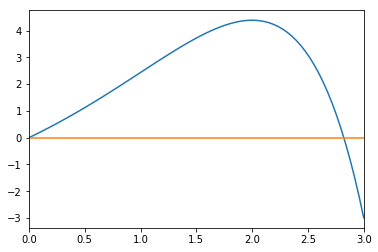

In [26]:
xpoints=linspace(-1,3,100)
plot(xpoints,f(xpoints))
plot(xpoints,zeros(len(xpoints)))
xlim(0,3)
show()

In [24]:
#from graph choose x1=1, x2=4

x1=1
x2=3
y1=f(x1)
y2=f(x2)
target=1e-6
while abs(x2-x1)>target:
    xp=(x1+x2)/2
    yp=f(xp)
    if y1*yp>0:
        x1=xp
        y1=yp
    else:
        x2=xp
        y2=yp
x=(x1+x2)/2
print(x)        

2.821439266204834


secant method

In [9]:
x1=1
x2=3
y1=f(x1)
y2=f(x2)
target=1e-6
while abs(x1-x2)>target:
    xnew=x2-f(x2)*(x2-x1)/(f(x2)-f(x1))
    x1=x2
    x2=xnew
print(x2)

2.821439372076073


In [10]:
delta

NameError: name 'delta' is not defined

In [47]:
# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
a=1e-11
w=10*a
h = 20*a/N
Vo=1
# Potential function
def V(x):
    return Vo*(x/a)**2

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(-w,w,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
    
    return r[N-1]

# Main program to find the energy using the secant method
E1 = 1*e
E2 = 100*e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in add


IndexError: index 999 is out of bounds for axis 0 with size 2

In [45]:
def psisolve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    xpoints=[]
    ypoints=[]
    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
        ypoints.append(r[0])
        xpoints.append(x)

    return(xpoints, ypoints)

In [35]:

x,psi=psisolve(E2)
norm=sqrt(sum(array(psi)**2))

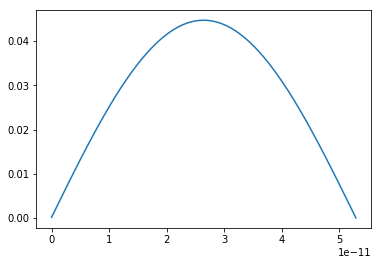

In [36]:
plot(x,psi/norm)
show()

In [ ]:
sum((psi/norm)**2)

In [27]:


g = 9.81         # Acceleration due to gravity
a = 0.0          # Initial time
b = 10.0         # Final time
N = 1000         # Number of Runge-Kutta steps
h = (b-a)/N      # Size of Runge-Kutta steps
target = 1e-10   # Target accuracy for binary search

# Function for Runge-Kutta calculation
def f(r):
    x = r[0]
    y = r[1]
    fx = y
    fy = -g
    return array([fx,fy],float)

# Function to solve the equation and calculate the final height
def height(v):
    r = array([0.0,v],float)
    for t in arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2-h1)>target:
    vp = (v1+v2)/2
    hp = height(vp)
    if h1*hp>0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

The required initial velocity is 49.04999999999815 m/s
